In [ ]:
import os
import glob
import pandas as pd


In [ ]:
# Define the directory containing the files
directory =  '../data/11_Output_R/'  #'/content/'
outdir ='../data/12_Output_python/'

filelist = glob.glob(directory+"Citywise Means*.csv")
print(filelist)

# Initialize an empty DataFrame for final merged means data
ML_data = pd.DataFrame()

first = True
# Loop through all Citywise Means csv files in the directory
for fl in filelist:  #os.listdir(directory):
    #if fl.startswith('Citywise Means') and fl.endswith('.csv'):
    flname =  fl  # os.path.join(directory, fl)
    print(flname)

    # Read the CSV file into a DataFrame
    df1 = pd.read_csv(flname, encoding="utf-8")

    # merge df1 to ML_data
    if (first):
        ML_data = df1
        first = False
    else:
        ML_data = pd.concat([ML_data, df1], ignore_index=True)

#save to csv
ML_data.to_csv( outdir+'UHI_NDVI_Swater_Means_data.csv', index=False, encoding="utf-8")

# Without 'NA values'
ML_data_cleaned = ML_data.dropna()

ML_data_cleaned.to_csv( outdir+'cleaned_UHI_NDVI_Swater_Means_data.csv', index=False, encoding="utf-8")

print("All records have been appended and saved to 'UHI_NDVI_Swater_Means_data.csv'")
print("Records with 'NA' values have been removed and saved to 'cleaned_UHI_NDVI_Swater_Means_data.csv'")


['../data/11_Output_R\\Citywise Means 0 .csv', '../data/11_Output_R\\Citywise Means 1 .csv', '../data/11_Output_R\\Citywise Means 10 .csv', '../data/11_Output_R\\Citywise Means 2 .csv', '../data/11_Output_R\\Citywise Means 3 .csv', '../data/11_Output_R\\Citywise Means 4 .csv', '../data/11_Output_R\\Citywise Means 5 .csv', '../data/11_Output_R\\Citywise Means 6 .csv', '../data/11_Output_R\\Citywise Means 7 .csv', '../data/11_Output_R\\Citywise Means 8 .csv', '../data/11_Output_R\\Citywise Means 9 .csv']
../data/11_Output_R\Citywise Means 0 .csv
../data/11_Output_R\Citywise Means 1 .csv
../data/11_Output_R\Citywise Means 10 .csv
../data/11_Output_R\Citywise Means 2 .csv
../data/11_Output_R\Citywise Means 3 .csv
../data/11_Output_R\Citywise Means 4 .csv
../data/11_Output_R\Citywise Means 5 .csv
../data/11_Output_R\Citywise Means 6 .csv
../data/11_Output_R\Citywise Means 7 .csv
../data/11_Output_R\Citywise Means 8 .csv
../data/11_Output_R\Citywise Means 9 .csv
All records have been appende

In [ ]:

dir1 =  outdir # ''  #'/content/'
dir2 = '../data/10_raw_Other_variables/'
dir3 = ''

file_path1 = os.path.join(dir1, 'UHI_NDVI_Swater_Means_data.csv')
file_path2 = os.path.join(dir2, 'combined_summary_City_Shape.csv')
file_path3 = os.path.join(dir3, 'City_coordinates.csv')
# Read the CSV file into a DataFrame
df_means = pd.read_csv(file_path1, encoding="utf-8")
df_city_shape = pd.read_csv(file_path2, encoding="utf-8")
df_coord = pd.read_csv(file_path3, encoding="utf-8")

print(df_means.shape)
print(df_city_shape.shape)
print(df_coord.shape)

#merge with coordinates data
df_means_coord = pd.merge( df_coord, df_means, on='city', how='left' )


df_means_coord.rename(columns={'city': 'City'}, inplace=True)
df_means.rename(columns={'city': 'City'}, inplace=True)

all_data_coord = pd.merge(df_means_coord, df_city_shape  , on='City', how='left'  )
all_data = pd.merge(df_means, df_city_shape  , on='City' , how='left' )

# Saveto CSV
all_data_coord.to_csv(dir1+'ML_input_data_coordinates.csv', index=False, encoding="utf-8")
all_data.to_csv(dir1+'ML_input_data.csv', index=False, encoding="utf-8")

print( all_data)

(6000, 7)
(5995, 6)
(6018, 4)
      Unnamed: 0        City    mean_ndvi  mean_surface_water  \
0              1     Aalborg  4679.282689            2.672234   
1              2      Aarhus  4766.372778            2.916598   
2              3         Aba  4547.316116            1.392857   
3              4      Abadan  1198.098344            1.915596   
4              5  Abaetetuba  4336.336242            2.055556   
...          ...         ...          ...                 ...   
5995         595  Ziguinchor  3857.942809            2.096154   
5996         596      Zilina  4653.904400            2.469136   
5997         597        Zima  2841.209456            2.272109   
5998         598      Zinder  1955.720430            1.840000   
5999         599      Zixing  5895.471659            2.000000   

      mean_uhi_DayNight  mean_uhi_daytime  mean_uhi_Nighttime      Continent  \
0              1.161372          0.759178            0.402194         EUROPE   
1              1.047580      

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dir1 = ''
UHI_data = pd.read_csv(dir1+'ML_input_data_coordinates.csv',  encoding="utf-8")

In [ ]:
# EDA
UHI_data.head()
UHI_data.describe()
UHI_data.describe(include = 'all')

City    longitude     latitude  \
count      6018  6018.000000  6018.000000   
unique     6018          NaN          NaN   
top     Brochet          NaN          NaN   
freq          1          NaN          NaN   
mean        NaN    10.436025    20.682179   
std         NaN    78.767277    28.029787   
min         NaN  -175.206801   -54.806550   
25%         NaN   -65.819197    -0.080569   
50%         NaN    18.685930    27.909327   
75%         NaN    73.078158    43.120232   
max         NaN   178.472893    77.482499   

                                     coordinates   Unnamed: 0    mean_ndvi  \
count                                       6018  6000.000000  5997.000000   
unique                                      6016          NaN          NaN   
top     [-155.80635752182368, 22.05491408827139]          NaN          NaN   
freq                                           2          NaN          NaN   
mean                                         NaN   298.827167  3983.282197   
std                                          NaN   173.175589  1645.491202   
min                                          NaN     1.000000     0.000000   
25%                                          NaN   149.000000  2996.740095   
50%                                          NaN   299.000000  4192.147504   
75%                                          NaN   449.000000  5226.841989   
max                                          NaN   600.000000  8383.380435   

        mean_surface_water  mean_uhi_DayNight  mean_uhi_daytime  \
count          5487.000000        3837.000000       3837.000000   
unique                 NaN                NaN               NaN   
top                    NaN                NaN               NaN   
freq                   NaN                NaN               NaN   
mean              2.063456           1.366485          0.794803   
std               0.531691           1.168282          1.080710   
min               1.000000          -6.495676         -6.771884   
25%               1.666667           0.768366          0.282230   
50%               2.000000           1.385278          0.845177   
75%               2.506806           2.017854          1.395688   
max               3.000000           6.770572          5.839117   

        mean_uhi_Nighttime Continent    Class     Skewness  Dip_Statistic  \
count          3837.000000      5983     5983  5983.000000    5983.000000   
unique                 NaN         7        5          NaN            NaN   
top                    NaN      ASIA  Pyramid          NaN            NaN   
freq                   NaN      1676     3354          NaN            NaN   
mean              0.571680       NaN      NaN     1.858064       0.403452   
std               0.493389       NaN      NaN     1.873677       0.446437   
min              -2.501164       NaN      NaN    -1.188415       0.000000   
25%               0.252565       NaN      NaN     0.781813       0.000000   
50%               0.498285       NaN      NaN     1.444997       0.086023   
75%               0.834690       NaN      NaN     2.319558       0.976694   
max               3.751978       NaN      NaN    31.997611       1.000000   

        Mean_Height  
count   5983.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       1.210399  
std        0.724661  
min        0.000000  
25%        0.701171  
50%        1.167897  
75%        1.638124  
max        5.910543

In [ ]:
UHI_data = UHI_data.drop(columns=['coordinates','Unnamed: 0', 'Continent', 'City'])
UHI_data.head()

longitude   latitude    mean_ndvi  mean_surface_water  mean_uhi_DayNight  \
0 -101.662499  57.887499  1866.260870            3.000000                NaN   
1 -141.195832  64.787499  2407.538889            2.500000                NaN   
2 -164.520832  62.787498  2970.785534                 NaN                NaN   
3 -171.012498  65.587501   793.725581            2.333333                NaN   
4 -110.737501  62.404167  1330.292918            2.750000                NaN   

   mean_uhi_daytime  mean_uhi_Nighttime    Class  Skewness  Dip_Statistic  \
0               NaN                 NaN  Pyramid  2.742307       0.994268   
1               NaN                 NaN  Pyramid  3.487868       0.999807   
2               NaN                 NaN  Unknown  0.000000       1.000000   
3               NaN                 NaN  Pyramid  0.648028       0.196626   
4               NaN                 NaN  Pyramid  0.606570       0.290467   

   Mean_Height  
0     0.105348  
1     0.005516  
2     0.000000  
3     0.093306  
4     0.172865

In [ ]:
UHI_data.head()
UHI_data.describe()
UHI_data.describe(include = 'all')
UHI_data[['Class']].value_counts()
UHI_data.isna().sum()

#dumy = pd.get_dummies(UHI_data['Class'])

#UHI_data['shape'] = UHI_data['Class']
#UHI_data['Class'].replace([{'Pyramid':1},{'Hourglass':2}, {'Diamond':3}, {'Inverse Pyramid':4},{'Unknown':5},{'NA':6} ], inplace= True)
UHI_data['Class'].replace(['Pyramid','Hourglass', 'Diamond', 'Inverse Pyramid','Unknown','NA' ],[1,2,3,4,5,6], inplace= True)




UHI_data.head()

#sns.pairplot(UHI_data,hue='Class')
#sns.pairplot(UHI_data,hue='mean_uhi_DayNight')

<ipython-input-38-7a30cdf7c1e7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  UHI_data['Class'].replace(['Pyramid','Hourglass', 'Diamond', 'Inverse Pyramid','Unknown','NA' ],[1,2,3,4,5,6], inplace= True)
<ipython-input-38-7a30cdf7c1e7>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  UHI_data['

longitude   latitude    mean_ndvi  mean_surface_water  mean_uhi_DayNight  \
0 -101.662499  57.887499  1866.260870            3.000000                NaN   
1 -141.195832  64.787499  2407.538889            2.500000                NaN   
2 -164.520832  62.787498  2970.785534                 NaN                NaN   
3 -171.012498  65.587501   793.725581            2.333333                NaN   
4 -110.737501  62.404167  1330.292918            2.750000                NaN   

   mean_uhi_daytime  mean_uhi_Nighttime  Class  Skewness  Dip_Statistic  \
0               NaN                 NaN    1.0  2.742307       0.994268   
1               NaN                 NaN    1.0  3.487868       0.999807   
2               NaN                 NaN    5.0  0.000000       1.000000   
3               NaN                 NaN    1.0  0.648028       0.196626   
4               NaN                 NaN    1.0  0.606570       0.290467   

   Mean_Height  
0     0.105348  
1     0.005516  
2     0.000000  
3     0.093306  
4     0.172865

In [ ]:
scaler = MinMaxScaler()
arr_scaled = scaler.fit_transform(UHI_data)

UHI_scaled = pd.DataFrame(scaler.fit_transform(UHI_data), columns=UHI_data.columns,index=UHI_data.index)
UHI_scaled.head()

longitude  latitude  mean_ndvi  mean_surface_water  mean_uhi_DayNight  \
0   0.207940  0.851877   0.222614            1.000000                0.5   
1   0.096163  0.904036   0.287180            0.833333                0.5   
2   0.030214  0.888917   0.354366            0.000000                0.5   
3   0.011859  0.910083   0.094678            0.777778                0.5   
4   0.182282  0.886020   0.158682            0.916667                0.5   

   mean_uhi_daytime  mean_uhi_Nighttime  Class  Skewness  Dip_Statistic  \
0               NaN                 NaN    0.0  0.118445       0.994268   
1               NaN                 NaN    0.0  0.140911       0.999807   
2               NaN                 NaN    1.0  0.035811       1.000000   
3               NaN                 NaN    0.0  0.055338       0.196626   
4               NaN                 NaN    0.0  0.054089       0.290467   

   Mean_Height  
0     0.017824  
1     0.000933  
2     0.000000  
3     0.015786  
4     0.029247

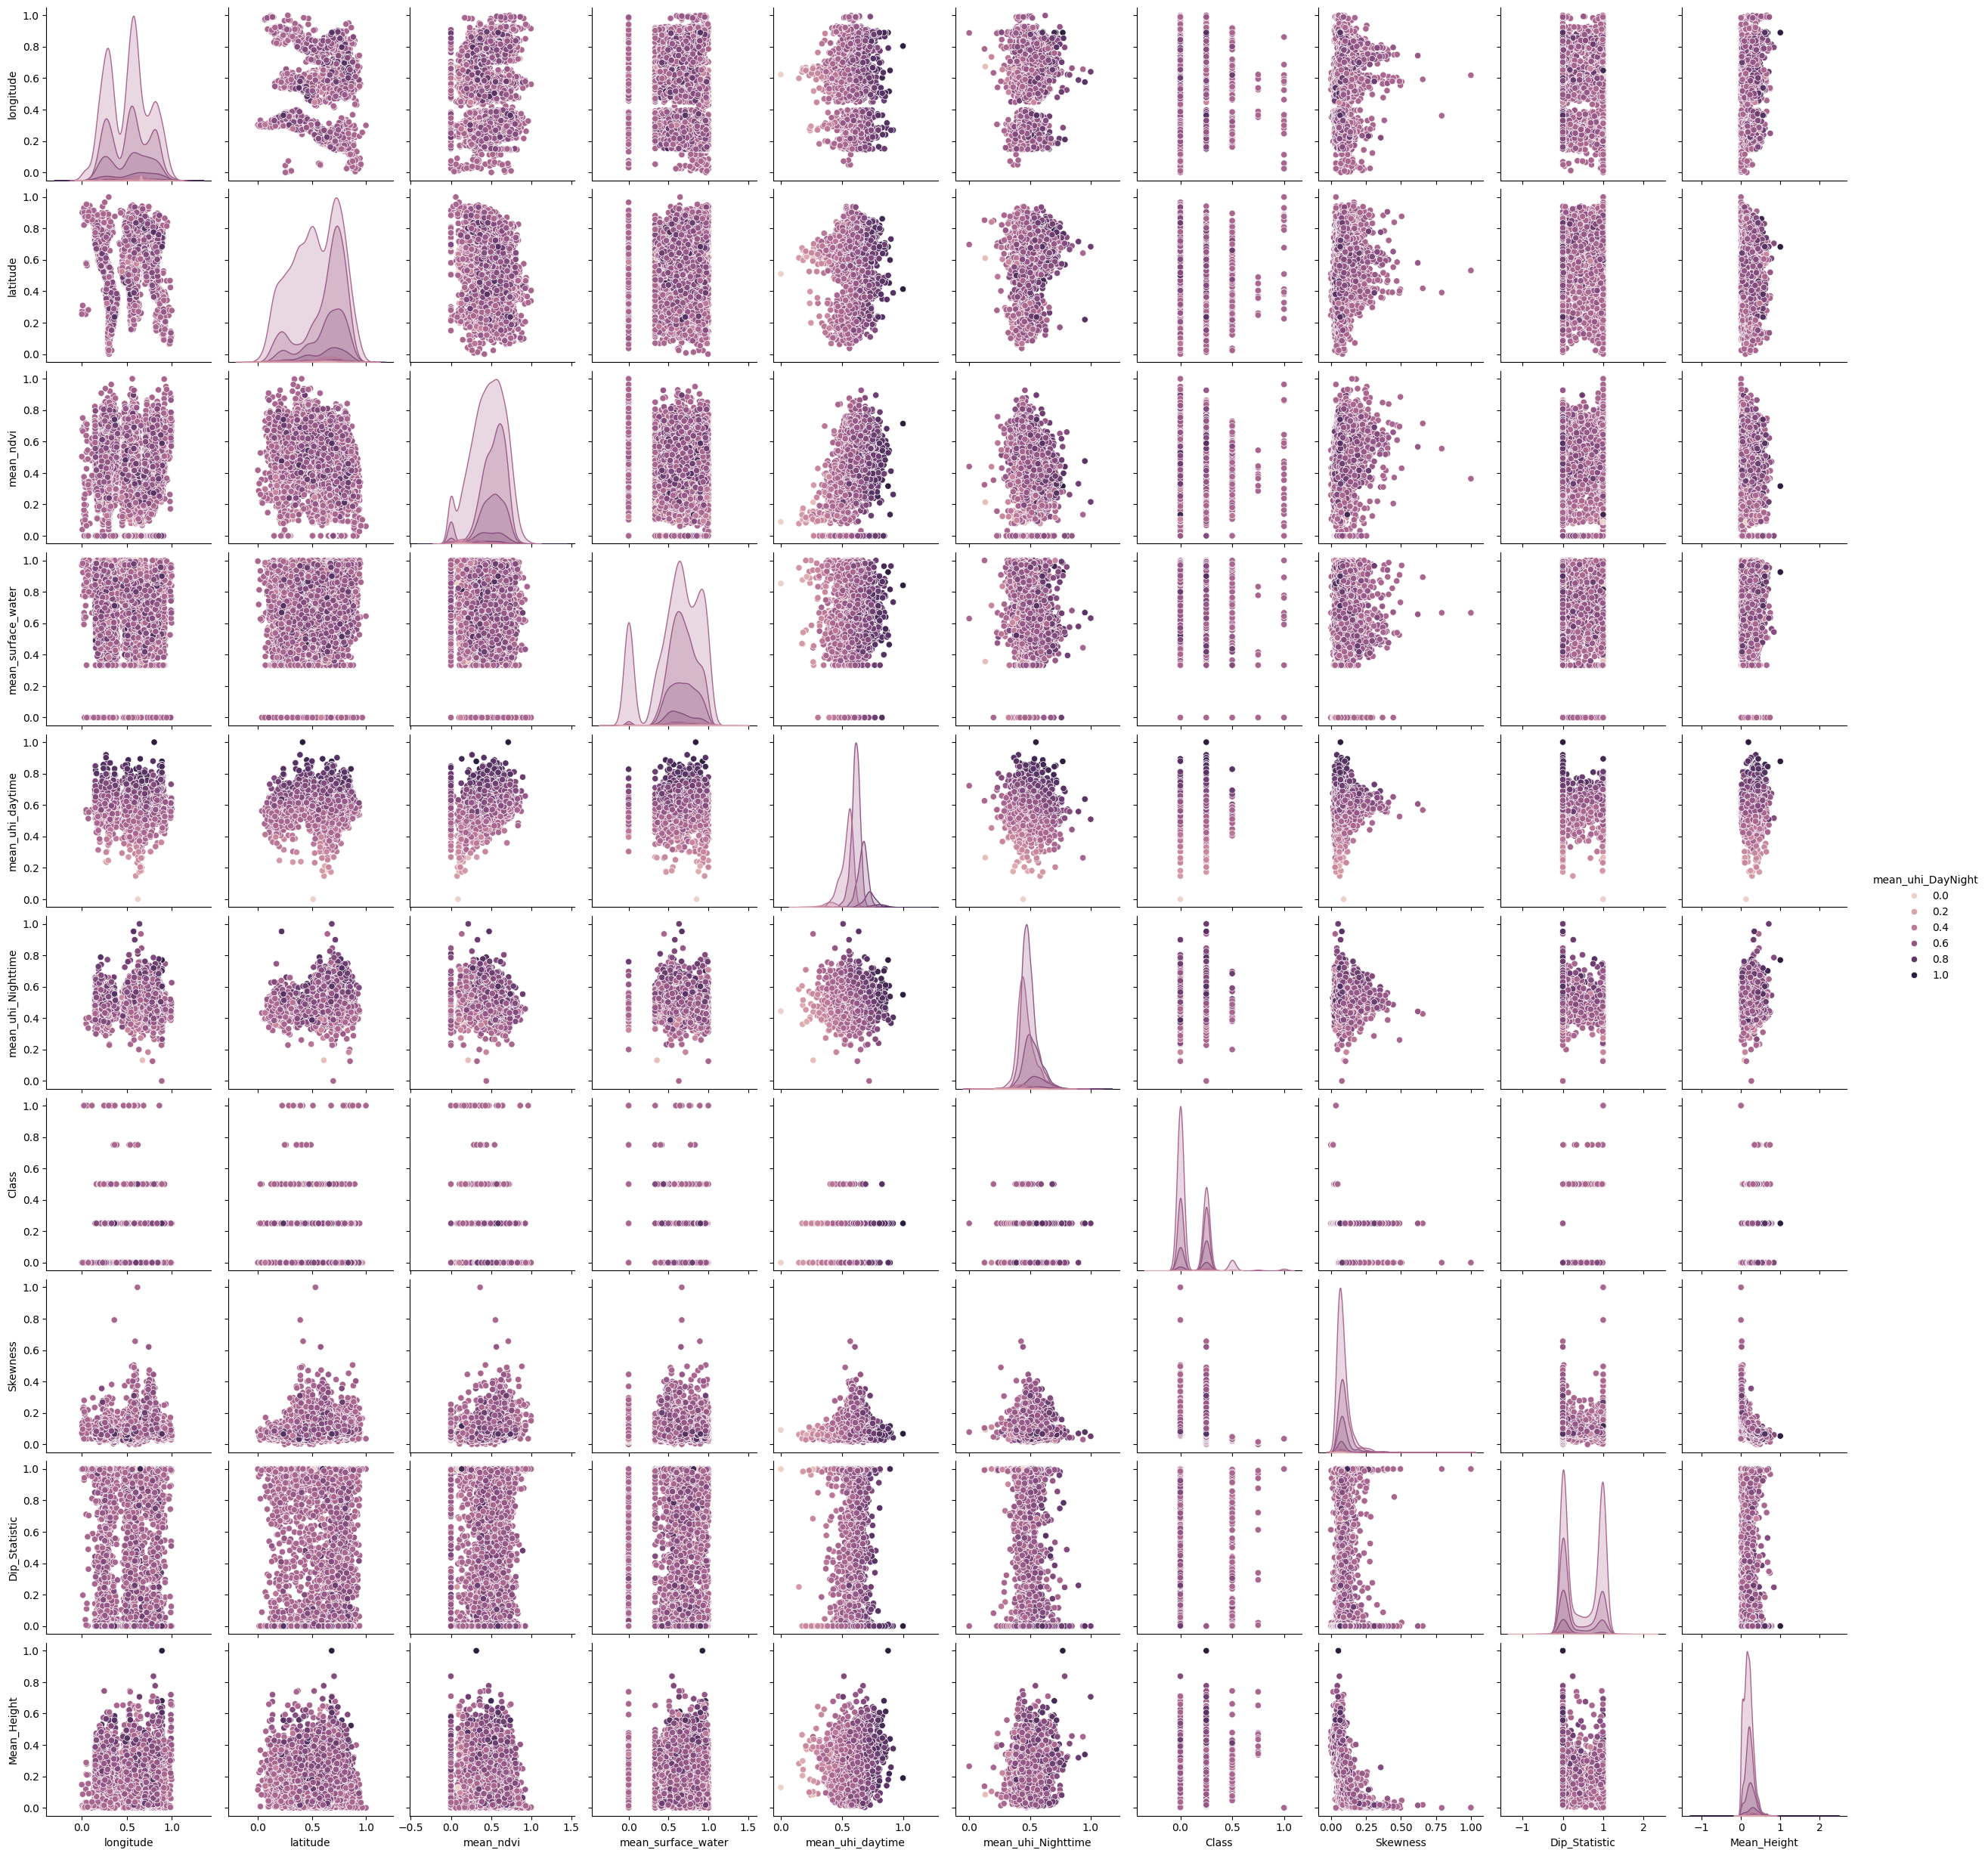

In [ ]:
sns.pairplot(UHI_scaled,hue='mean_uhi_DayNight')

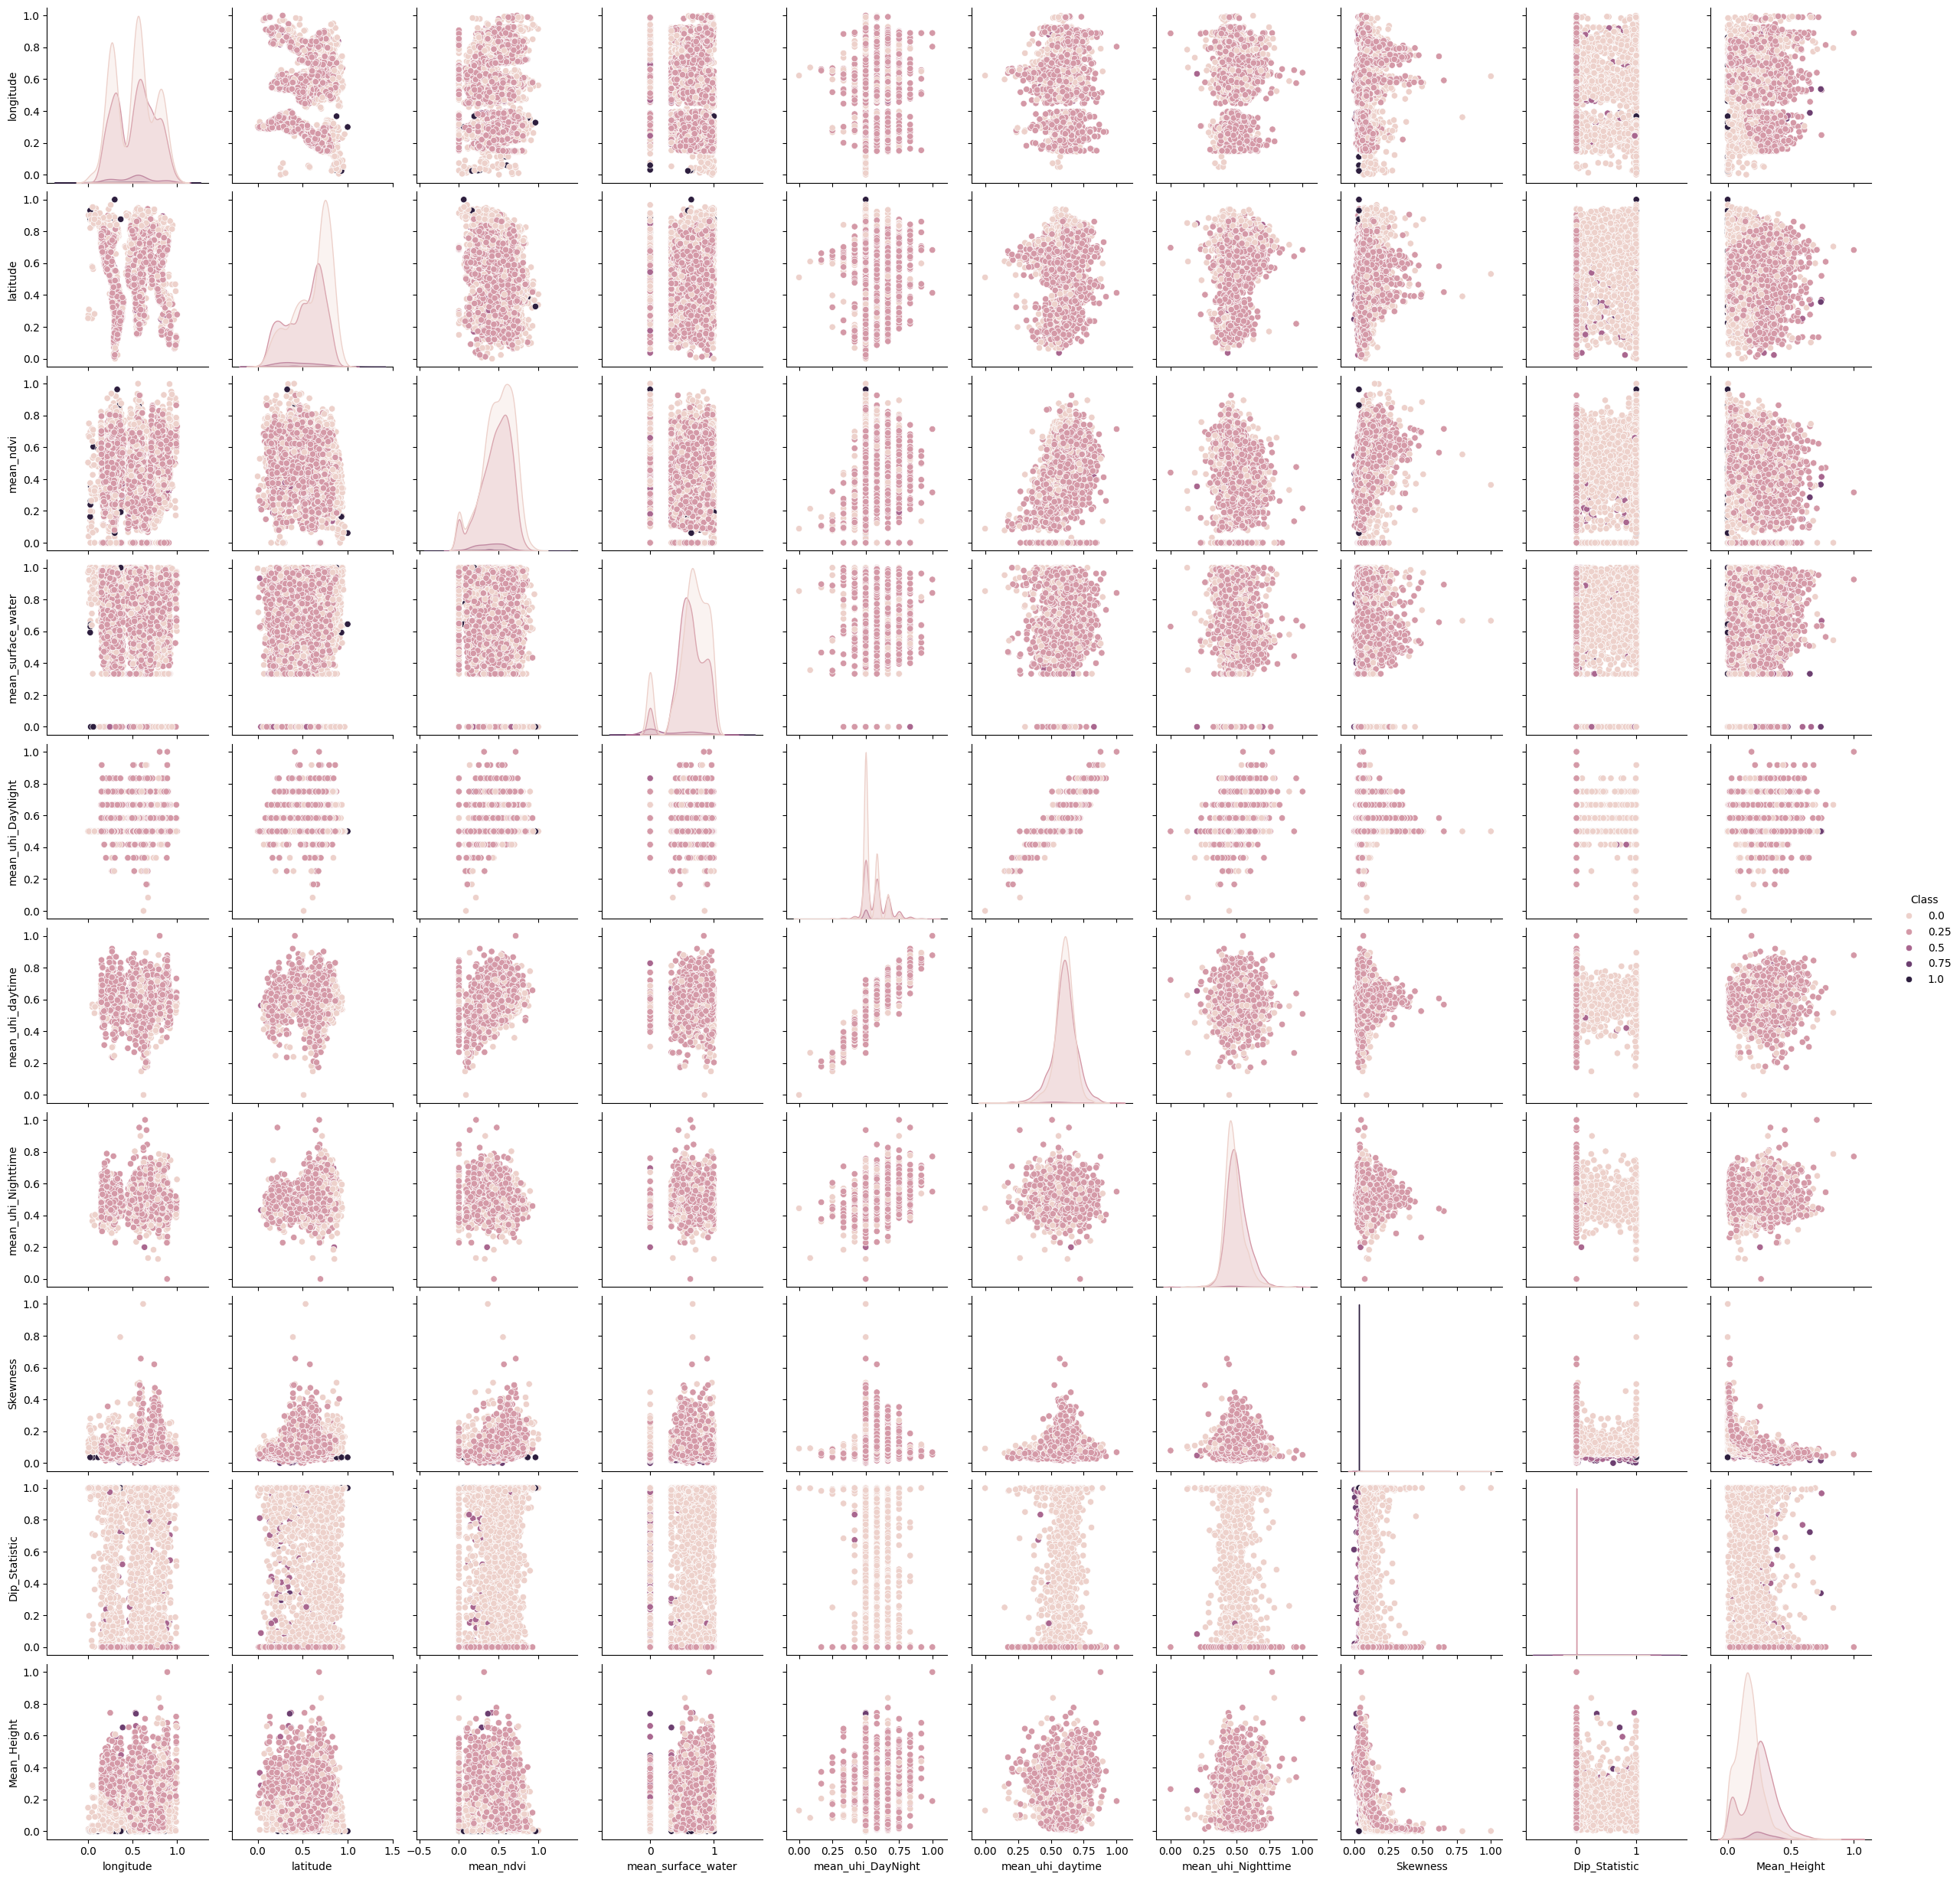

In [57]:
sns.pairplot(UHI_scaled,hue='Class')

In [66]:
# EDA
#UHI_data.head()
#UHI_data.describe()
#UHI_data.describe(include = 'all')
#UHI_data[['Class']].value_counts()
#UHI_data.isna().sum()
#sns.pairplot(UHI_data,hue='Class')

UHI_scaled['mean_uhi_DayNight']= UHI_scaled['mean_uhi_DayNight'].fillna(0)
UHI_scaled['mean_surface_water']= UHI_scaled['mean_surface_water'].fillna(0)
UHI_scaled['mean_ndvi']= UHI_scaled['mean_ndvi'].fillna(0)

UHI_scaled['mean_uhi_DayNight']= UHI_scaled['mean_uhi_DayNight']

#endog= (UHI_data['mean_uhi_DayNight'] ).astype('float') # (UHI_data[['Class']]=='Up').astype('int64')
#exog=sm.add_constant(UHI_data['mean_ndvi'])   #UHI_data.drop(columns=['Continent','mean_uhi_DayNight','mean_uhi_daytime','mean_uhi_Nighttime', 'Class']))
#logit_mod=sm.Logit(endog,exog)
logit_res= sm.logit('mean_uhi_DayNight ~ mean_ndvi + Class +mean_surface_water +Mean_Height+ Skewness	+Dip_Statistic', data= UHI_scaled ).fit()

#logit_res=logit_mod.fit()
logit_res.summary()
logit_res.pred_table()



Optimization terminated successfully.
         Current function value: 0.679784
         Iterations 4


array([[2.000e+00, 1.110e+02],
       [1.990e+02, 5.671e+03]])

In [67]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      mean_uhi_DayNight   No. Observations:                 5983
Model:                          Logit   Df Residuals:                     5976
Method:                           MLE   Df Model:                            6
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 -0.4167
Time:                        03:51:13   Log-Likelihood:                -4067.1
converged:                       True   LL-Null:                       -2870.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1964      0.145     -1.354      0.176      -0.481       0.088
mean_ndvi              0.2409      0.136      1.777      0.076      -0.025       0.507
Class                 -0.0385      0.226     -0.171      0.865      -0.481       0.404
mean_surface_water     0.0686      0.105      0.655      0.513      -0.137       0.274
Mean_Height            0.8597      0.284      3.027      0.002       0.303       1.416
Skewness               1.1578      0.582      1.988      0.047       0.016       2.300
Dip_Statistic         -0.0814      0.076     -1.073      0.283      -0.230       0.067
======================================================================================
"""

In [ ]:
matrix = pd.DataFrame(logit_res.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()

sns.heatmap(matrix, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

TN = logit_res.pred_table()[0,0] # 54
TP = logit_res.pred_table()[1,1] #557
FN = logit_res.pred_table()[1,0] #48
FP = logit_res.pred_table()[0,1] #557

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)

[Accuracy,Recall,Precision]

In [ ]:
# Build ML model
